In [1]:
import numpy as np
import matplotlib.pyplot as plt
def d(func, x, dx):
    return (func(x+dx) - func(x-dx))/(2*dx)

def d3(func,x,dx):
    return (-0.5*func(x-2*dx) + func(x-dx) - func(x+dx) + 0.5*func(x+2*dx))/(dx**3)

def ideal_dx(func,x,dx0 = 1E-3):
    third_deriv = d3(func,x,dx0)
    with np.errstate(divide = 'ignore'):
        dx1 = np.cbrt(3*func(x)*1E-16/(d3(func,x,dx0)))
    dx1[np.where(np.isnan(dx1))] = dx0
    dx1[np.where(np.isinf(dx1))] = dx0
    return np.abs(dx1)

def ndiff(fun , x, full=False):
    # Estimate ideal dx, we use 1E-3, as a starting guess for dx
    dx = ideal_dx(fun, x, 1E-3)
    # Calculated the derivative with given dx
    df = d(fun, x, dx)
    # Return if all we want is the derivative
    if not full:
        return df
    else: # Estimate error for full output
        error = np.abs(fun(x) * np.finfo(np.double).eps / dx + d3(fun,x,dx)*(dx**2))
    return df,dx,error

In [2]:
x = np.linspace(1, 10, 100)
func_exp = lambda x: np.exp(x)
exp_deriv = ndiff(func_exp,x)

In [3]:
func_power = lambda x: np.power(x,2)
exp_power = ndiff(func_power, x)

In [4]:
func_sin = lambda x: np.sin(x)
exp_sin = ndiff(func_sin, x)

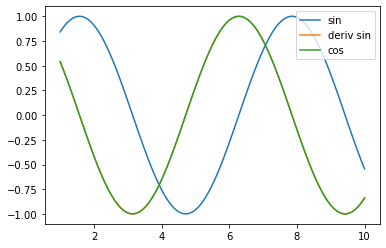

In [5]:
plt.plot(x, func_sin(x), label= 'sin')
plt.plot(x, exp_sin, label= 'deriv sin' )
plt.plot(x, np.cos(x), label='cos')
plt.legend()